In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df_raw = pd.read_csv("2023-10-22_12 02 59_weather_log.csv")

# 01 Explore data

In [4]:
df_raw.head()

dt  visibility  clouds   uvi    temp  wind_speed  wind_deg  \
0  1696947124       10000      84  1.19  295.97        2.33       250   
1  1696947725       10000      84  1.19  295.55        2.33       250   
2  1696948325       10000      89  0.50  295.42        1.95       235   
3  1696948926       10000      89  0.50  295.42        1.95       235   
4  1696949527       10000      89  0.50  295.28        1.95       235   

   wind_gust     sunrise  feels_like      sunset  pressure  dew_point  \
0       2.95  1696915368      295.53  1696955589      1021     284.08   
1       2.95  1696915368      295.07  1696955589      1021     283.70   
2       3.11  1696915368      295.11  1696955589      1020     285.67   
3       3.11  1696915368      295.11  1696955589      1020     285.67   
4       3.11  1696915368      294.96  1696955589      1020     285.54   

   humidity  current  voltage        power  
0        47   468.75  3.93750  1845.703125  
1        47   362.50  2.95250  1070.281250  
2        54   448.75  3.74250  1679.446875  
3        54   350.00  2.80250   980.875000  
4        54   377.50  3.05125  1151.846875

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dt          1523 non-null   int64  
 1   visibility  1523 non-null   int64  
 2   clouds      1523 non-null   int64  
 3   uvi         1523 non-null   float64
 4   temp        1523 non-null   float64
 5   wind_speed  1523 non-null   float64
 6   wind_deg    1523 non-null   int64  
 7   wind_gust   1523 non-null   float64
 8   sunrise     1523 non-null   int64  
 9   feels_like  1523 non-null   float64
 10  sunset      1523 non-null   int64  
 11  pressure    1523 non-null   int64  
 12  dew_point   1523 non-null   float64
 13  humidity    1523 non-null   int64  
 14  current     1523 non-null   float64
 15  voltage     1523 non-null   float64
 16  power       1523 non-null   float64
dtypes: float64(9), int64(8)
memory usage: 202.4 KB


In [ ]:
df_raw.corr()

In [6]:
current = df_raw['current'].to_numpy()
voltage = df_raw['voltage'].to_numpy()
power = df_raw['power'].to_numpy()
uvi = df_raw['uvi'].to_numpy()

In [ ]:
uvi.min()

In [ ]:
current.max()

In [ ]:
voltage.max()

In [ ]:
power.max()

In [7]:
unique, counts = np.unique(current, return_counts=True)

print(dict(zip(unique, counts)))

{-2.5: 16, -1.25: 243, 0.0: 504, 1.25: 96, 2.5: 11, 3.75: 8, 5.0: 6, 6.25: 7, 7.5: 5, 8.75: 2, 10.0: 7, 11.25: 2, 12.5: 1, 13.75: 5, 15.0: 7, 16.25: 2, 17.5: 3, 18.75: 4, 20.0: 1, 21.25: 5, 22.5: 2, 23.75: 4, 25.0: 4, 26.25: 1, 27.5: 2, 28.75: 2, 30.0: 1, 31.25: 1, 32.5: 1, 33.75: 2, 35.0: 4, 36.25: 6, 37.5: 1, 38.75: 2, 40.0: 1, 41.25: 2, 42.5: 5, 43.75: 3, 45.0: 4, 46.25: 4, 48.75: 5, 50.0: 1, 51.25: 1, 52.5: 5, 53.75: 2, 55.0: 1, 56.25: 2, 57.5: 1, 58.75: 6, 60.0: 2, 61.25: 2, 63.75: 3, 65.0: 1, 67.5: 2, 68.75: 4, 70.0: 1, 71.25: 2, 72.5: 3, 73.75: 3, 75.0: 3, 76.25: 3, 77.5: 1, 78.75: 2, 82.5: 3, 83.75: 2, 85.0: 1, 86.25: 1, 87.5: 1, 88.75: 2, 90.0: 1, 91.25: 2, 92.5: 1, 93.75: 2, 95.0: 3, 96.25: 2, 98.75: 2, 101.25: 2, 103.75: 2, 105.0: 1, 106.25: 2, 107.5: 1, 110.0: 2, 111.25: 1, 112.5: 2, 113.75: 1, 117.5: 2, 118.75: 1, 121.25: 4, 122.5: 4, 123.75: 3, 125.0: 1, 126.25: 3, 127.5: 3, 128.75: 1, 130.0: 5, 131.25: 2, 132.5: 2, 133.75: 4, 135.0: 2, 136.25: 2, 137.5: 4, 138.75: 3, 140

In [ ]:
df_raw.info()

# 02 Pre-process data

In [4]:
df_processed = df_raw.copy()

### Set current to 0 for absolute values of 1.25

In [5]:
df_processed.loc[df_processed.current <= 1.25, 'current'] = 0

In [11]:
unique, counts = np.unique(df_processed.current, return_counts=True)

print(dict(zip(unique, counts)))

{0.0: 859, 2.5: 11, 3.75: 8, 5.0: 6, 6.25: 7, 7.5: 5, 8.75: 2, 10.0: 7, 11.25: 2, 12.5: 1, 13.75: 5, 15.0: 7, 16.25: 2, 17.5: 3, 18.75: 4, 20.0: 1, 21.25: 5, 22.5: 2, 23.75: 4, 25.0: 4, 26.25: 1, 27.5: 2, 28.75: 2, 30.0: 1, 31.25: 1, 32.5: 1, 33.75: 2, 35.0: 4, 36.25: 6, 37.5: 1, 38.75: 2, 40.0: 1, 41.25: 2, 42.5: 5, 43.75: 3, 45.0: 4, 46.25: 4, 48.75: 5, 50.0: 1, 51.25: 1, 52.5: 5, 53.75: 2, 55.0: 1, 56.25: 2, 57.5: 1, 58.75: 6, 60.0: 2, 61.25: 2, 63.75: 3, 65.0: 1, 67.5: 2, 68.75: 4, 70.0: 1, 71.25: 2, 72.5: 3, 73.75: 3, 75.0: 3, 76.25: 3, 77.5: 1, 78.75: 2, 82.5: 3, 83.75: 2, 85.0: 1, 86.25: 1, 87.5: 1, 88.75: 2, 90.0: 1, 91.25: 2, 92.5: 1, 93.75: 2, 95.0: 3, 96.25: 2, 98.75: 2, 101.25: 2, 103.75: 2, 105.0: 1, 106.25: 2, 107.5: 1, 110.0: 2, 111.25: 1, 112.5: 2, 113.75: 1, 117.5: 2, 118.75: 1, 121.25: 4, 122.5: 4, 123.75: 3, 125.0: 1, 126.25: 3, 127.5: 3, 128.75: 1, 130.0: 5, 131.25: 2, 132.5: 2, 133.75: 4, 135.0: 2, 136.25: 2, 137.5: 4, 138.75: 3, 140.0: 2, 141.25: 1, 142.5: 3, 143.

In [6]:
df_processed.loc[df_processed.voltage < 0, 'voltage'] = 0
df_processed.loc[df_processed.current == 0, 'voltage'] = 0
df_processed.loc[df_processed.current == 0, 'power'] = 0

In [7]:
df_processed['is_day'] = df_processed.apply(lambda row: 1 if row['sunrise'] < row['dt'] and row['sunset'] > row['dt'] else 0, axis=1)

In [8]:
df_processed.drop(columns=['sunset', 'sunrise', 'visibility'], inplace=True)

In [ ]:
df_processed.corr()

In [9]:
df_processed[(df_processed.is_day == 0) & (df_processed.power > 0)]

dt  clouds  uvi    temp  wind_speed  wind_deg  wind_gust  \
15    1696956135      83  0.0  291.30        1.61       236       1.62   
91    1697001788      73  0.0  284.34        1.62       189       1.72   
158   1697042035       8  0.0  292.38        2.67       223       2.58   
234   1697087688      99  0.0  284.33        2.61       238       4.80   
363   1697174790      98  0.0  285.89        2.58       216       6.77   
428   1697214436      74  0.0  295.23        3.24       160       4.30   
725   1697434293       8  0.0  273.72        0.85        78       0.87   
790   1697473339      12  0.0  280.25        1.66        81       1.69   
791   1697473939      15  0.0  279.83        1.27        71       1.31   
869   1697520794      89  0.0  274.55        1.61        89       1.65   
933   1697559839     100  0.0  281.01        1.71        90       1.83   
1010  1697606694      96  0.0  274.25        2.61        84       4.61   

      feels_like  pressure  dew_point  humidity  current  voltage     power  \
15        290.89      1021     284.85        66     2.50  0.02000  0.050000   
91        283.76      1021     282.09        86     2.50  0.02250  0.056250   
158       292.16      1018     286.56        69     5.00  0.04250  0.212500   
234       283.54      1018     280.64        78     2.50  0.01125  0.028125   
363       284.89      1018     279.26        64     2.50  0.01500  0.037500   
428       295.03      1013     286.85        59     3.75  0.03375  0.126562   
725       273.72      1024     272.77        93     5.00  0.03250  0.162500   
790       279.31      1020     272.83        59     3.75  0.02125  0.079687   
791       279.83      1021     273.08        62     2.50  0.00625  0.015625   
869       272.83      1021     271.22        77     3.75  0.03375  0.126562   
933       280.13      1018     274.19        62     3.75  0.01375  0.051562   
1010      271.32      1015     271.86        83     3.75  0.02750  0.103125   

      is_day  
15         0  
91         0  
158        0  
234        0  
363        0  
428        0  
725        0  
790        0  
791        0  
869        0  
933        0  
1010       0

In [10]:
df_processed.loc[df_processed.is_day == 0, ['current','voltage','power']] = 0

In [11]:
df_processed[(df_processed.is_day == 0) & (df_processed.power > 0)]

Empty DataFrame
Columns: [dt, clouds, uvi, temp, wind_speed, wind_deg, wind_gust, feels_like, pressure, dew_point, humidity, current, voltage, power, is_day]
Index: []

In [ ]:
df_processed['dt'] = df_processed['dt'].map(lambda timestamp: datetime.fromtimestamp(timestamp))

In [ ]:
df_processed['dt'] = df_processed['dt'].dt.time

In [12]:
df_processed['dt']

0       1696947124
1       1696947725
2       1696948325
3       1696948926
4       1696949527
           ...    
1518    1697966512
1519    1697967113
1520    1697967713
1521    1697968314
1522    1697968915
Name: dt, Length: 1523, dtype: int64

In [ ]:
df_processed['dt'] = df_processed['dt'].map(lambda time: (time.hour * 60 + time.minute)*60+time.second)

In [ ]:
df_processed.corr()

# Exploration

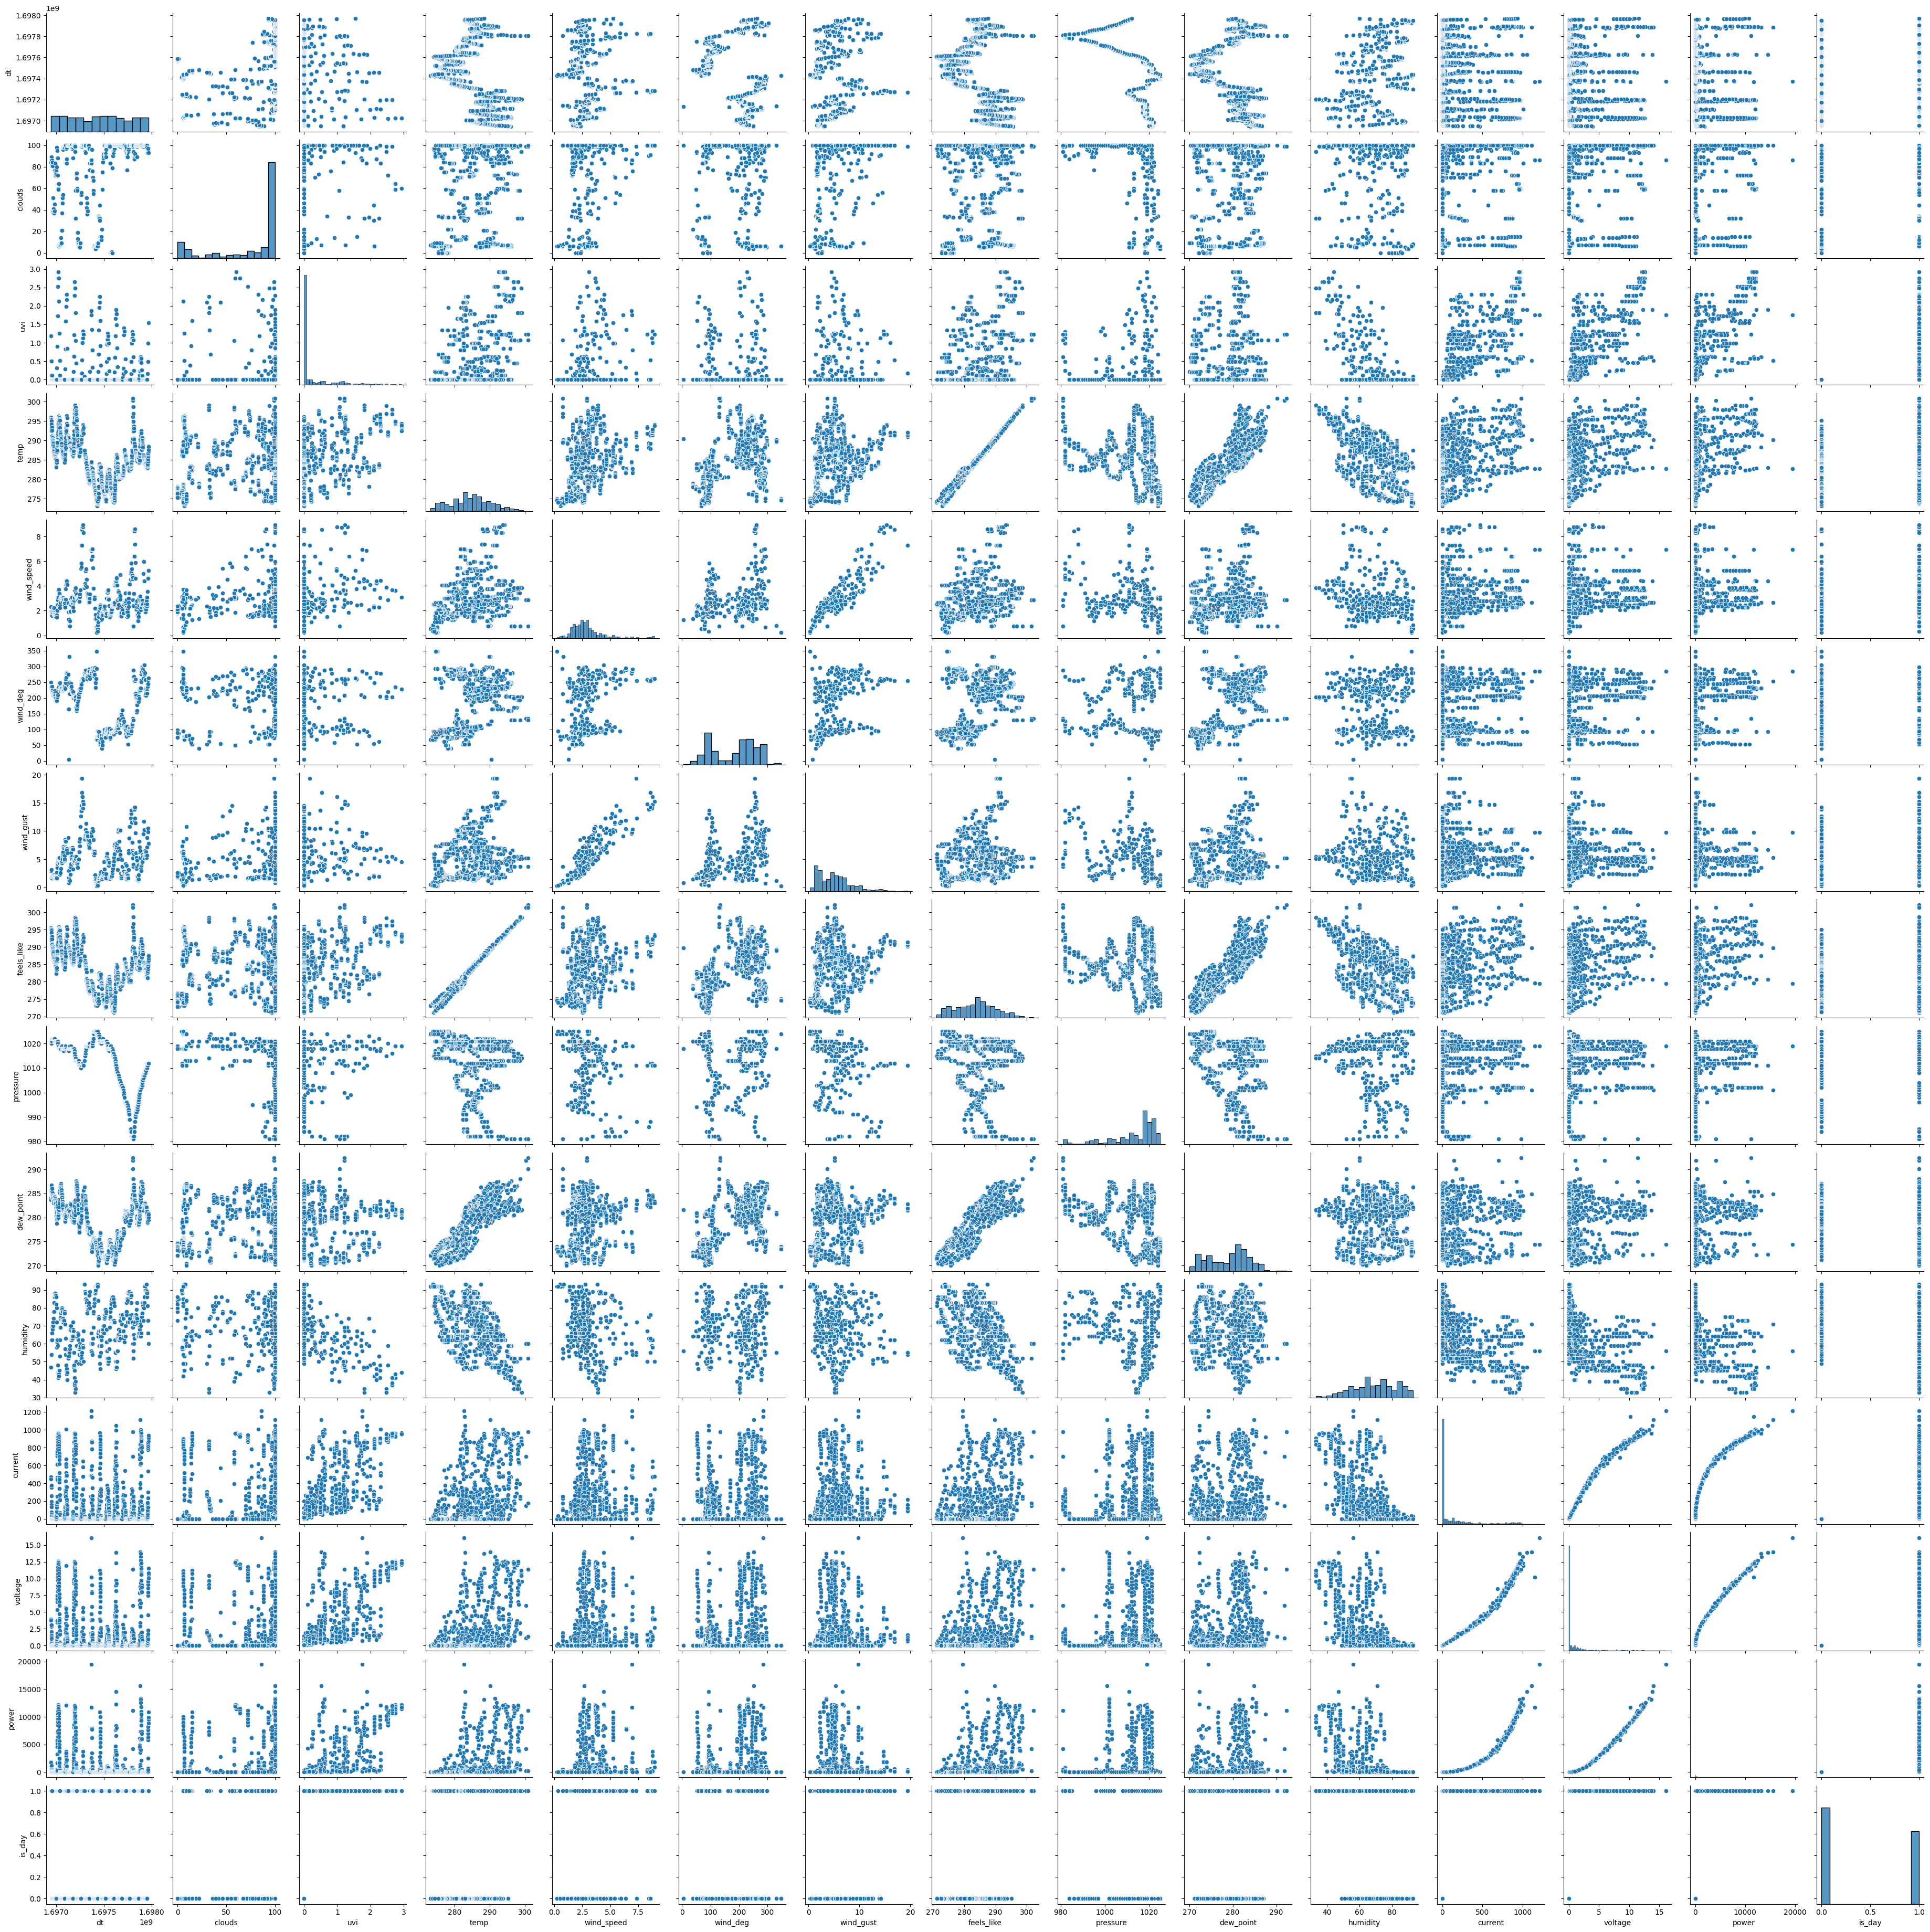

In [13]:
sns.pairplot(df_processed)

In [12]:
df_reduced = df_processed.copy()

In [13]:
df_reduced.drop(columns=['wind_speed', 'wind_deg', 'wind_gust', 'feels_like', 'dew_point', 'humidity'], inplace=True)

In [ ]:
df_reduced.corr()

In [ ]:
sns.pairplot(df_reduced)

# Setup Model

## Multivariate Polynomial Regression

In [14]:
degree = 2

### All data

In [14]:
X_complete = df_processed.drop(columns=['power', 'current', 'voltage'], axis=1)
y_complete = df_processed['power']

In [15]:
X_train_complete, X_test_complete, y_train_complete, y_test_complete = train_test_split(X_complete, y_complete, test_size=0.3, random_state=101)

### Reduced data

In [16]:
X_reduced = df_reduced.drop(columns=['power', 'current', 'voltage'], axis=1)
y_reduced = df_reduced['power']

##### All RMSE values according to random_state=101

In [17]:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.3, random_state=101)

### Support Vector Regression

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
StdS_X = StandardScaler()
StdS_y = StandardScaler()

#### Complete Data
- Complete Data RMSE: 1381.2640889219967

In [60]:
y_train_complete_shaped = y_train_complete.to_numpy().reshape(-1,1)
X_train_complete_scaled = StdS_X.fit_transform(X_train_complete)
y_train_complete_scaled = StdS_y.fit_transform(y_train_complete_shaped)
regressor_complete = SVR(kernel='rbf')
regressor_complete.fit(X_train_complete_scaled,y_train_complete_scaled.ravel())
pred_complete = StdS_y.inverse_transform(regressor_complete.predict(StdS_X.transform(X_test_complete)).reshape(-1,1))
RMSE_complete = mean_squared_error(y_test_complete,pred_complete,squared=False)
print(RMSE_complete)

1381.2640889219967


##### Hyperparameter optimization with gridsearch
- RMSE: 1326.0161044678691

First Grid search with:
grid = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}
BEST: SVR(C=10, coef0=10, gamma='auto', kernel='poly')
RMSE: 1326.01

Second Grid search with:
grid = {'kernel' : ('poly', 'rbf'),'C' : [10,15,20],'degree' : [3],'coef0' : [8,10,12],'gamma' : ('auto','scale')}
BEST: SVR(C=10, coef0=12, gamma='scale', kernel='poly')
RMSE: 1327.4266682134587

Third Grid search with:
grid = {'kernel' : ('poly', 'rbf'),'C' : [9,10,11],'degree' : [2,3,4],'coef0' : [11,12,13],'gamma' : ('auto','scale')}

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
param_grid = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}
regressor = SVR()

In [21]:
grids = GridSearchCV(regressor, param_grid, n_jobs = -1, verbose = 2)

In [23]:
y_train_complete_shaped = y_train_complete.to_numpy().reshape(-1,1)
X_train_complete_scaled = StdS_X.fit_transform(X_train_complete)
y_train_complete_scaled = StdS_y.fit_transform(y_train_complete_shaped)

In [24]:
grids.fit(X_train_complete_scaled,y_train_complete_scaled.ravel())

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[CV] END .C=1, coef0=0.01, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .C=1, coef0=0.01, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=3, gamma=auto, kernel=linear; total time=   0.1s
[CV] END .C=1, coef0=0.01, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END .C=1, coef0=0.01, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..C=1, coef0=0.01, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END .C=1, coef0=0.01, degree=3, gamma=auto, kernel=poly; total time=   0.0s
[CV] END ..C=1, coef0=0.01, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END C=1, coef0=0.01, degree=3, gamma=auto, kernel=linear; total time=   0.1s
[CV] END C=1, coef0=0.01, degree=3, gamma=auto, kernel=linear; total time=   0.1s
[CV] END C=1, coef0=0.01, degree=3, gamma=auto, kernel=linear; total time=   0.1s
[CV] END ..C=1, coef0=0.01, degree=3, gamma=auto, kernel=rbf; total time=   0.0s
[CV] END ..C=1, coef0=0.

GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 5, 10], 'coef0': [0.01, 10, 0.5],
                         'degree': [3, 8], 'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             verbose=2)

In [28]:
results_df = pd.read_feather('gridsearch_results.feather')

In [53]:
results_df.sort_values(by='rank_test_score').iloc[0]

mean_fit_time                                                 5.817711
std_fit_time                                                  1.061846
mean_score_time                                               0.002849
std_score_time                                                0.000045
param_C                                                             10
param_coef0                                                         10
param_degree                                                         3
param_gamma                                                       auto
param_kernel                                                      poly
params               {'C': 10, 'coef0': 10, 'degree': 3, 'gamma': '...
split0_test_score                                             0.785462
split1_test_score                                             0.764952
split2_test_score                                             0.837056
split3_test_score                                             0.771942
split4

In [19]:
results_df.sort_values(by='rank_test_score').head()


mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
113       5.817711      1.061846         0.002849        0.000045       10   
117       5.619666      1.168506         0.003109        0.000523       10   
126       0.036075      0.002326         0.004509        0.000439       10   
110       0.034043      0.001144         0.004138        0.000087       10   
118       0.033501      0.001191         0.004177        0.000189       10   

     param_coef0  param_degree param_gamma param_kernel  \
113        10.00             3        auto         poly   
117        10.00             3       scale         poly   
126        10.00             8       scale          rbf   
110         0.01             8       scale          rbf   
118        10.00             3       scale          rbf   

                                                params  split0_test_score  \
113  {'C': 10, 'coef0': 10.0, 'degree': 3, 'gamma':...           0.785462   
117  {'C': 10, 'coef0': 10.0, 'degree': 3, 'gamma':...           0.786339   
126  {'C': 10, 'coef0': 10.0, 'degree': 8, 'gamma':...           0.822881   
110  {'C': 10, 'coef0': 0.01, 'degree': 8, 'gamma':...           0.822881   
118  {'C': 10, 'coef0': 10.0, 'degree': 3, 'gamma':...           0.822881   

     split1_test_score  split2_test_score  split3_test_score  \
113           0.764952           0.837056           0.771942   
117           0.764883           0.838326           0.769129   
126           0.735515           0.850254           0.714414   
110           0.735515           0.850254           0.714414   
118           0.735515           0.850254           0.714414   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
113           0.904921         0.812866        0.052499                1  
117           0.904874         0.812710        0.052976                2  
126           0.906295         0.805872        0.071636                3  
110           0.906295         0.805872        0.071636                3  
118           0.906295         0.805872        0.071636                3

In [29]:
results_df.drop(columns=['split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'params', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'], inplace=True)

In [37]:
results_df.sort_values(by='rank_test_score').head()

rank_test_score  param_C  param_coef0  param_degree param_gamma  \
113                1       10        10.00             3        auto   
117                2       10        10.00             3       scale   
126                3       10        10.00             8       scale   
110                3       10         0.01             8       scale   
118                3       10        10.00             3       scale   

    param_kernel  mean_test_score  std_test_score  
113         poly         0.812866        0.052499  
117         poly         0.812710        0.052976  
126          rbf         0.805872        0.071636  
110          rbf         0.805872        0.071636  
118          rbf         0.805872        0.071636

In [36]:
results_df = results_df[['rank_test_score','param_C', 'param_coef0','param_degree','param_gamma','param_kernel','mean_test_score','std_test_score']]

In [40]:
print(results_df.sort_values(by='rank_test_score').head().to_latex())

\begin{tabular}{lrrrrllrr}
\toprule
 & rank_test_score & param_C & param_coef0 & param_degree & param_gamma & param_kernel & mean_test_score & std_test_score \\
\midrule
113 & 1 & 10 & 10.000000 & 3 & auto & poly & 0.812866 & 0.052499 \\
117 & 2 & 10 & 10.000000 & 3 & scale & poly & 0.812710 & 0.052976 \\
126 & 3 & 10 & 10.000000 & 8 & scale & rbf & 0.805872 & 0.071636 \\
110 & 3 & 10 & 0.010000 & 8 & scale & rbf & 0.805872 & 0.071636 \\
118 & 3 & 10 & 10.000000 & 3 & scale & rbf & 0.805872 & 0.071636 \\
\bottomrule
\end{tabular}



In [59]:
y_train_complete_shaped = y_train_complete.to_numpy().reshape(-1,1)
X_train_complete_scaled = StdS_X.fit_transform(X_train_complete)
y_train_complete_scaled = StdS_y.fit_transform(y_train_complete_shaped)
regressor_complete = SVR(C=10, coef0=10, gamma='auto', kernel='poly', degree=3)
regressor_complete.fit(X_train_complete_scaled,y_train_complete_scaled.ravel())
pred_complete = StdS_y.inverse_transform(regressor_complete.predict(StdS_X.transform(X_test_complete)).reshape(-1,1))
RMSE_complete = mean_squared_error(y_test_complete,pred_complete,squared=False)
print(RMSE_complete)

1326.0161044678691


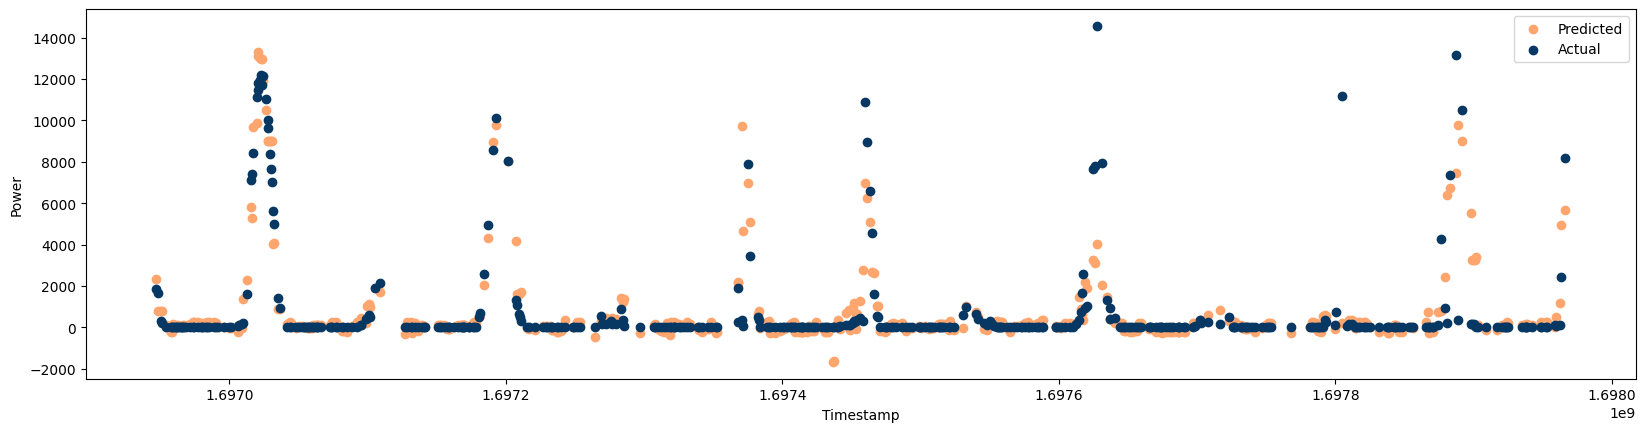

In [21]:
fig, ax = plt.subplots()

ax.scatter(X_test_complete['dt'], pred_complete, color='#ffa66f', label="Predicted")
ax.scatter(X_test_complete['dt'], y_test_complete, color='#073763', label="Actual")
legend = ax.legend(loc='upper right')
# ax.bar(hours, pred_complete)
fig.set_figwidth(20)
# plt.xticks(hours)
plt.ylabel("Power")
plt.xlabel("Timestamp")
plt.show()

#### Reduced Data
- Reduced Data RMSE: 1459.8550018116057

In [62]:
y_train_reduced_shaped = y_train_reduced.to_numpy().reshape(-1,1)
X_train_reduced_scaled = StdS_X.fit_transform(X_train_reduced)
y_train_reduced_scaled = StdS_y.fit_transform(y_train_reduced_shaped)
regressor_reduced = SVR(kernel='rbf')
regressor_reduced.fit(X_train_reduced_scaled,y_train_reduced_scaled.ravel())
pred_reduced = StdS_y.inverse_transform(regressor_reduced.predict(StdS_X.transform(X_test_reduced)).reshape(-1,1))
RMSE_reduced = mean_squared_error(y_test_reduced,pred_reduced,squared=False)
print(RMSE_reduced)

1459.8550018116057


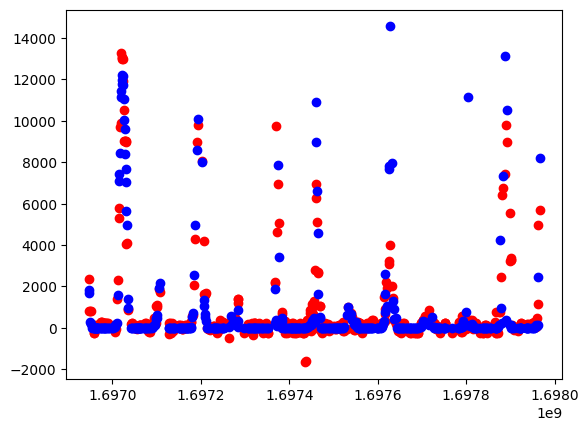

In [63]:
plt.scatter(x=X_test_reduced['dt'], y=pred_complete, color='red')
plt.scatter(x=X_test_reduced['dt'], y=y_test_complete, color='blue')
plt.show()

## Model Evaluation

### Linear Regression all data

- RMSE: 1736.311531009354

In [75]:
y_train_complete_shaped = y_train_complete.to_numpy().reshape(-1,1)
X_train_complete_scaled = StdS_X.fit_transform(X_train_complete)
y_train_complete_scaled = StdS_y.fit_transform(y_train_complete_shaped)
linear_model_complete = LinearRegression()
linear_model_complete.fit(X_train_complete_scaled,y_train_complete_scaled)

LinearRegression()

In [76]:
y_pred_linear_complete = StdS_y.inverse_transform(linear_model_complete.predict(StdS_X.transform(X_test_complete)).reshape(-1,1))

In [77]:
mean_squared_error(y_test_complete, y_pred_linear_complete, squared=False)

1736.311531009354

### Linear Regression reduced data

- RMSE: 1764.335229627625

In [83]:
y_train_reduced_shaped = y_train_reduced.to_numpy().reshape(-1,1)
X_train_reduced_scaled = StdS_X.fit_transform(X_train_reduced)
y_train_reduced_scaled = StdS_y.fit_transform(y_train_reduced_shaped)
linear_model_reduced = LinearRegression()
linear_model_reduced.fit(X_train_reduced_scaled,y_train_reduced_scaled)

LinearRegression()

In [84]:
y_pred_linear_reduced = StdS_y.inverse_transform(linear_model_reduced.predict(StdS_X.transform(X_test_reduced)).reshape(-1,1))

In [85]:
mean_squared_error(y_test_reduced, y_pred_linear_reduced, squared=False)

1764.335229627625

### Multivariate Polynomial Regression with all data

- RMSE: 1633.4981016108911

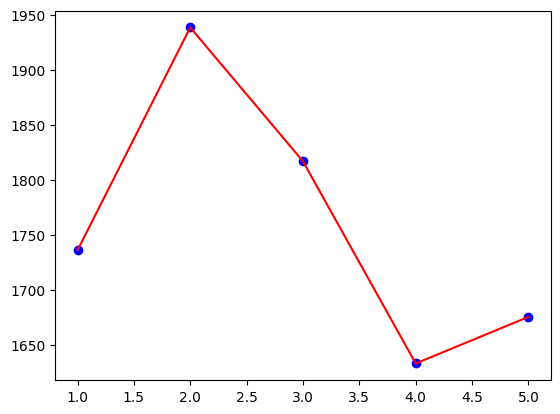

In [86]:
number_degrees = [1,2,3,4,5]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model_complete = PolynomialFeatures(degree=degree)

   poly_x_train_complete = poly_model_complete.fit_transform(X_train_complete)
   poly_x_test_complete = poly_model_complete.fit_transform(X_test_complete)

   poly_model_complete.fit(poly_x_train_complete, y_train_complete)

   regression_model_complete = LinearRegression()
   regression_model_complete.fit(poly_x_train_complete, y_train_complete)

   y_pred_complete = regression_model_complete.predict(poly_x_test_complete)
  
   plt_mean_squared_error.append(mean_squared_error(y_test_complete, y_pred_complete, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="blue")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 

In [87]:
np.min(plt_mean_squared_error)

1633.4981016108911

### Multivariate Polynomial Regression with reduced data

- RMSE: 1607.787357591157

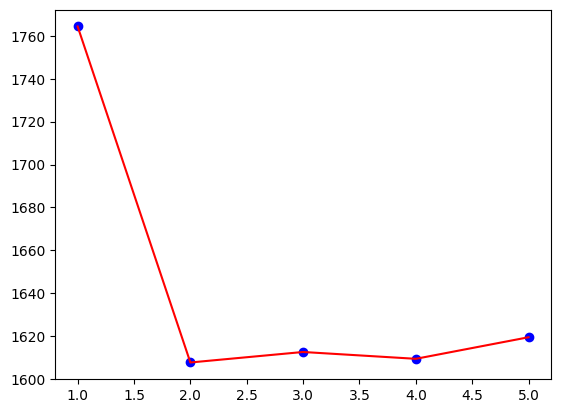

In [88]:
number_degrees = [1,2,3,4,5]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model_reduced = PolynomialFeatures(degree=degree)
   
   poly_x_train_reduced = poly_model_reduced.fit_transform(X_train_reduced)
   poly_x_test_reduced = poly_model_reduced.fit_transform(X_test_reduced)

   poly_model_reduced.fit(poly_x_train_reduced, y_train_reduced)
  
   regression_model_reduced = LinearRegression()
   regression_model_reduced.fit(poly_x_train_reduced, y_train_reduced)
   y_pred_reduced = regression_model_reduced.predict(poly_x_test_reduced)
  
   plt_mean_squared_error.append(mean_squared_error(y_test_reduced, y_pred_reduced, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="blue")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 

In [89]:
np.min(plt_mean_squared_error)

1607.787357591157

# Get minute forecast

In [22]:
import json

In [23]:
with open('minute_forecast.json') as file:
    forecast = json.load(file)

In [24]:
forecast.keys()

dict_keys(['lat', 'lon', 'timezone', 'timezone_offset', 'current', 'minutely', 'hourly', 'daily'])

In [25]:
unneeded_keys = ['minutely']

In [26]:
for key in unneeded_keys:
    forecast.pop(key, None)

In [27]:
forecast['hourly'][0].keys()

dict_keys(['dt', 'temp', 'feels_like', 'pressure', 'humidity', 'dew_point', 'uvi', 'clouds', 'visibility', 'wind_speed', 'wind_deg', 'wind_gust', 'weather', 'pop'])

In [28]:
df_processed.keys()

Index(['dt', 'clouds', 'uvi', 'temp', 'wind_speed', 'wind_deg', 'wind_gust',
       'feels_like', 'pressure', 'dew_point', 'humidity', 'current', 'voltage',
       'power', 'is_day'],
      dtype='object')

In [29]:
processed_forecast = []
keys=['dt', 'clouds', 'uvi', 'temp', 'wind_speed', 'wind_deg', 'wind_gust',
       'feels_like', 'pressure', 'dew_point', 'humidity', 'is_day']
sample_dict = {}
for key in keys:
    sample_dict[key] = None

In [30]:
def is_day(timestamp):
    for day in forecast['daily']:
        day_starttime = day['dt']- 36000
        diff = timestamp - day_starttime
        if diff >= 0 and diff < 86400:
            return 1 if day['sunrise'] < timestamp and day['sunset'] > timestamp else 0

In [31]:
for hour in forecast['hourly']:
    hour['is_day'] = is_day(hour['dt'])
    pop_keys = set(hour.keys()) - set(sample_dict.keys())
    for key in pop_keys:
        hour.pop(key, None)
    d = sample_dict.copy() | hour
    processed_forecast.append(list(d.values()))
    

In [32]:
hours = []

In [33]:
for hour in processed_forecast:
    hours.append(hour[0])

In [40]:
pred_complete = StdS_y.inverse_transform(regressor_complete.predict(StdS_X.transform(processed_forecast)).reshape(-1,1))

/home/raphi/.pyenv/versions/3.11.3/envs/GreenAI_regression/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


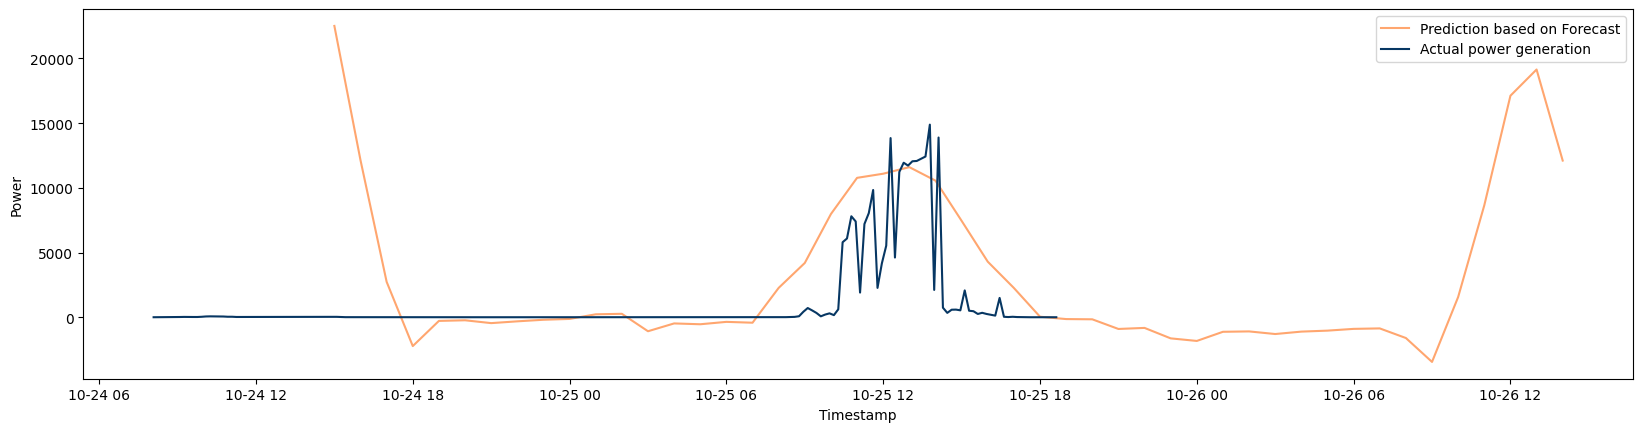

In [85]:
fig, ax = plt.subplots()

ax.plot(hours_datetime, pred_complete, color='#ffa66f', label="Prediction based on Forecast")
ax.plot(test_timestamps_datetime, test_power, color='#073763', label="Actual power generation")
legend = ax.legend(loc='upper right')
# ax.bar(hours, pred_complete)
fig.set_figwidth(20)
plt.ylabel("Power")
plt.xlabel("Timestamp")
# plt.xticks(hours)
plt.show()

In [ ]:
fig, ax = plt.subplots()

ax.plot(hours_datetime, pred_complete, color='#ffa66f', label="Prediction based on Forecast")
ax.plot(test_timestamps_datetime, test_power, color='#073763', label="Actual power generation")
legend = ax.legend(loc='upper right')
# ax.bar(hours, pred_complete)
fig.set_figwidth(20)
plt.ylabel("Power")
plt.xlabel("Timestamp")
# plt.xticks(hours)
plt.show()

In [35]:
df_test = pd.read_csv("2023-10-25_20 03 15_weather_log.csv")

In [36]:
df_test_reduced = df_test[df_test.dt > 1698127200]

In [37]:
test_timestamps = df_test_reduced['dt'].to_numpy()
test_power = df_test_reduced['power'].to_numpy()

In [43]:
hours_datetime = [datetime.fromtimestamp(timestamp) for timestamp in hours]

In [45]:
test_timestamps_datetime = [datetime.fromtimestamp(timestamp) for timestamp in test_timestamps]

In [61]:
pred_complete_cleaned = [0 if power[0] < 0 else power[0] for power in pred_complete.tolist()]

In [68]:
from subset import subset_sum_closest

In [142]:
consumers =[5000,3000,1000,3500,8000,4000]
queue = []
labels = []

In [143]:
for power in pred_complete_cleaned:
    selected_consumers, usage = subset_sum_closest(consumers, int(power))
    queue.append(usage)
    if selected_consumers:
        labels.append(selected_consumers)
    else:
        labels.append(' ')

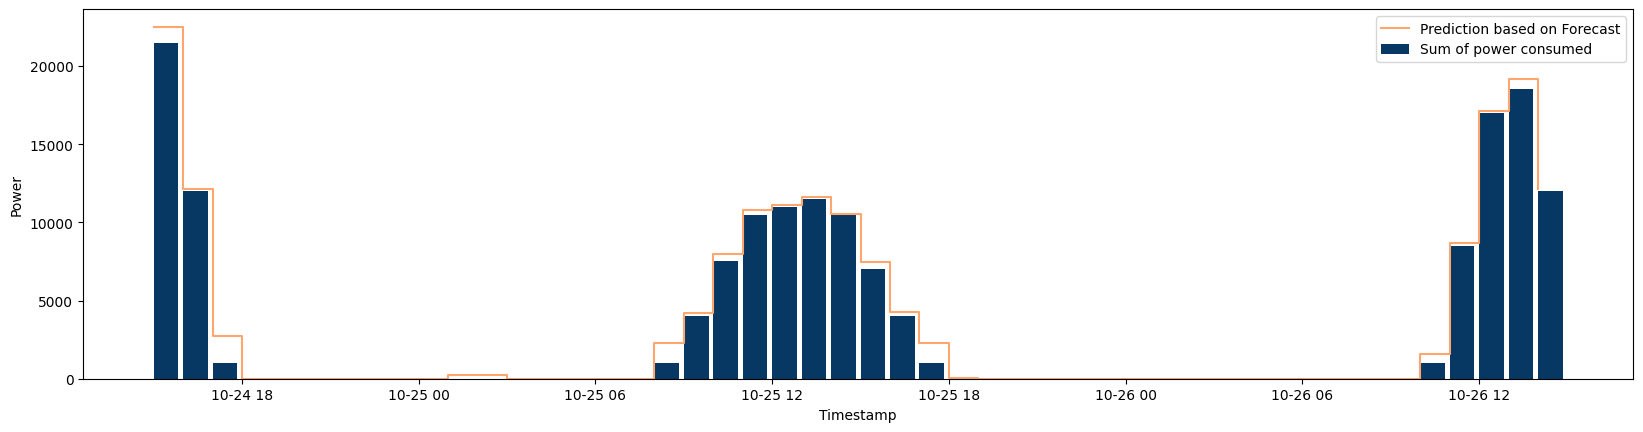

In [149]:
fig, ax = plt.subplots()

ax.step(hours_datetime, pred_complete_cleaned, color='#ffa66f', label="Prediction based on Forecast", where='post')
# ax.plot(test_timestamps_datetime, test_power, color='#073763', label="Actual power generation")
bars = ax.bar(hours_datetime, queue, width=0.035, align='edge', color='#073763', label='Sum of power consumed')
legend = ax.legend(loc='upper right')
# ax.bar_label(bars, labels=labels, label_type='center', rotation=90, color='white')
fig.set_figwidth(20)
plt.ylabel("Power")
plt.xlabel("Timestamp")
# plt.xticks(hours)
plt.show()